<a href="https://colab.research.google.com/github/Pratik872-bit/Cancer-Dectection--DL--model/blob/main/Cancer_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [6]:
data=pd.read_csv("/content/drive/MyDrive/cancer_detection_data.csv")
print(data)

     Age  Tumor_Size  Clump_Thickness  Uniformity_Cell_Size  \
0     71       49.81                9                     5   
1     34       36.36                9                     4   
2     80       22.29                8                     8   
3     40       38.17                1                     1   
4     43       46.19                1                     9   
..   ...         ...              ...                   ...   
495   66       43.09                6                     2   
496   68       47.99               10                    10   
497   33       11.96               10                     8   
498   34       33.05                9                     5   
499   50       26.34                1                     7   

     Uniformity_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                        2                  1                            5   
1                        8                  8                            3   
2        

In [9]:
x=data.iloc[:,:-1]
y=data['Malignant']


0      1
1      1
2      0
3      0
4      0
      ..
495    0
496    0
497    1
498    1
499    1
Name: Malignant, Length: 500, dtype: int64


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [95]:
model=Sequential([
    Dense(8,activation='relu',input_shape=(x_train.shape[1],)),

    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [97]:
history=model.fit(
   x_train,y_train,
  validation_data=(x_test,y_test),
  epochs=10,
  batch_size=6
)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5794 - loss: 9.2009 - val_accuracy: 0.5400 - val_loss: 5.7275
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5570 - loss: 4.0672 - val_accuracy: 0.5300 - val_loss: 1.3925
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5033 - loss: 1.4571 - val_accuracy: 0.5100 - val_loss: 1.1398
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5181 - loss: 1.3258 - val_accuracy: 0.5300 - val_loss: 1.0950
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5304 - loss: 1.2403 - val_accuracy: 0.5300 - val_loss: 1.0415
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5598 - loss: 1.1137 - val_accuracy: 0.5300 - val_loss: 0.9815
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5393 - loss: 1.1254 - val_accuracy: 0.5400 - val_loss: 0.9444
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5013 - loss: 1.0649 - val_accuracy: 0.5300 - val_los

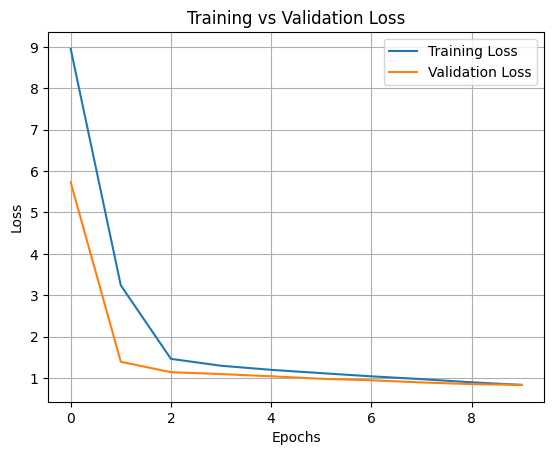

In [98]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
